In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
Datos = pd.read_csv('C:\Titanic-Dataset.csv')

In [3]:
Datos.head(150)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S


In [4]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

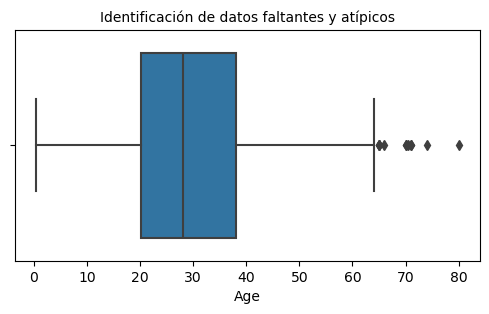

In [6]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de datos faltantes y atípicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

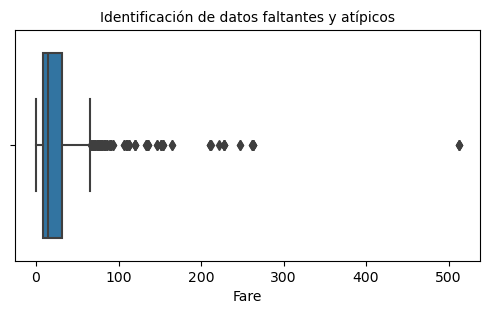

In [7]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de datos faltantes y atípicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

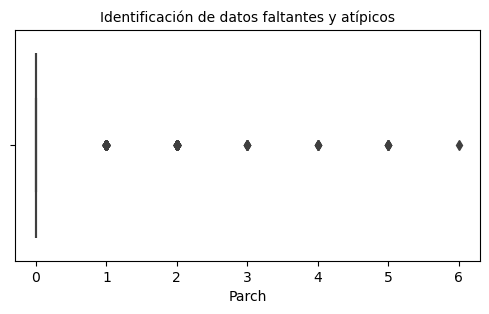

In [9]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Parch'])
plt.title('Identificación de datos faltantes y atípicos',fontsize=10)

In [10]:
print("Preprocesar los datos limpiandolos y tratando valores faltantes")

Preprocesar los datos limpiandolos y tratando valores faltantes


In [11]:
print("Cantidad de registros con el cero en el campo Age: ",Datos['Age'].isin([0]).sum())
print("Cantidad de registros con el cero en el Fare:",Datos['Fare'].isin([0]).sum())
print("Cantidad de registros con el cero en el campo Parch: ",Datos['Parch'].isin([0]).sum())
print("Cantidad de registros con el cero en el campo SibSp: ",Datos['SibSp'].isin([0]).sum())

Cantidad de registros con el cero en el campo Age:  0
Cantidad de registros con el cero en el Fare: 15
Cantidad de registros con el cero en el campo Parch:  678
Cantidad de registros con el cero en el campo SibSp:  608


In [12]:
Datos['Age']=Datos['Age'].replace(0,Datos['Age'].mean())
Datos['Fare']=Datos['Fare'].replace(0,Datos['Fare'].mean())
Datos['Parch']=Datos['Parch'].replace(0,Datos['Parch'].mean())
Datos['SibSp']=Datos['SibSp'].replace(0,Datos['SibSp'].mean())

In [13]:
print("cantidad de registros en cero en el campo Age",Datos['Age'].isin([0]).sum())
print("cantidad de registros en cero en el campo Fare",Datos['Fare'].isin([0]).sum())
print("cantidad de registros en cero en el campo Parch",Datos['Parch'].isin([0]).sum())
print("cantidad de registros en cero en el campo SibSp",Datos['SibSp'].isin([0]).sum())

cantidad de registros en cero en el campo Age 0
cantidad de registros en cero en el campo Fare 0
cantidad de registros en cero en el campo Parch 0
cantidad de registros en cero en el campo SibSp 0


Text(0.5, 1.0, 'identificacion de datos atipicos')

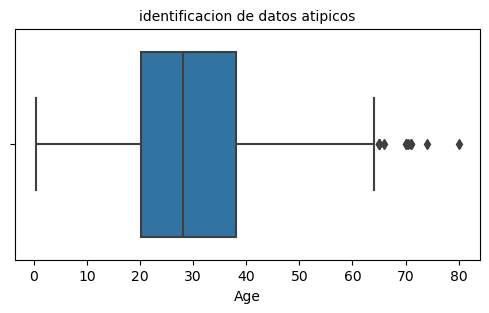

In [14]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('identificacion de datos atipicos',fontsize=10)

In [49]:
nivel_minimo=1000000
nivel_maximo=5000000
Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))

el total de datos atipicos es 0


In [54]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  0 non-null      int64  
 1   Survived     0 non-null      int64  
 2   Pclass       0 non-null      int64  
 3   Name         0 non-null      object 
 4   Sex          0 non-null      object 
 5   Age          0 non-null      float64
 6   SibSp        0 non-null      float64
 7   Parch        0 non-null      float64
 8   Ticket       0 non-null      object 
 9   Fare         0 non-null      float64
 10  Cabin        0 non-null      object 
 11  Embarked     0 non-null      object 
dtypes: float64(4), int64(3), object(5)
memory usage: 0.0+ bytes


In [55]:
Datos['Fare'].value_counts()

Series([], Name: count, dtype: int64)

In [58]:
Datos[['Fare']].head(15)

,Fare


In [60]:
Datos.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survived,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

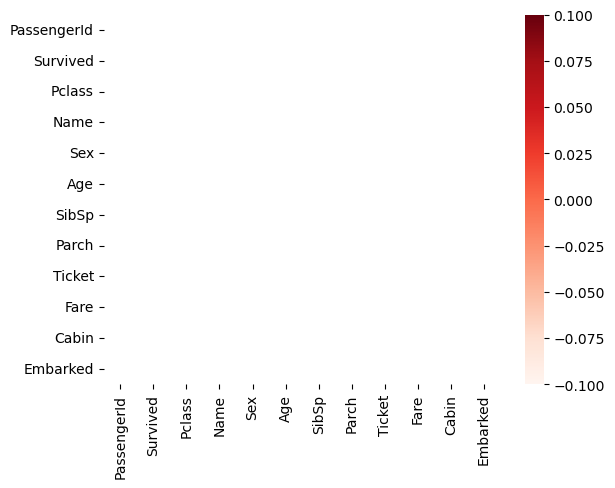

In [61]:
sns.heatmap(Datos.corr(), annot=True,cmap='Reds')

In [70]:
print("X=",X.shape,"\ny=", y.shape)

X= (0, 11) 
y= (0,)


In [98]:
from sklearn.linear_model import LogisticRegression

In [116]:
Datos = pd.read_csv('C:\Titanic-Dataset.csv')

In [117]:
Datos['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [120]:
Datosx=Datos.drop('Name',axis=1)
Datos=Datos.drop('Sex',axis=1)
y=Datos['Survived']
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

In [125]:
print(Datos.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [127]:
Datos = Datos.drop('Name', axis=1)

In [132]:
Datos = Datos.drop('Cabin', axis=1)

In [133]:
Datos = Datos.drop('Embarked', axis=1)

In [134]:
Datos = Datos.drop('Ticket', axis=1)

In [135]:
print(Datos.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [136]:
Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [137]:
x=Datos.drop('Survived',axis=1)
y=Datos['Survived']
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [144]:
modelo_regression=LogisticRegression(solver="liblinear")


In [141]:
print(y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64
